# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Lecture 7 Exercise </center>

# <center>DBSCAN Clustering</center>


# Part A: Differentiate DBSCAN from KMean using any iris dataset

# Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Data Manipulation with pandas

In [9]:
#load dataset here
from sklearn.datasets import load_iris
iris = load_iris()
idf = pd.DataFrame(iris.data, columns=iris.feature_names)
idf.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2. Data Exploration and Visualization

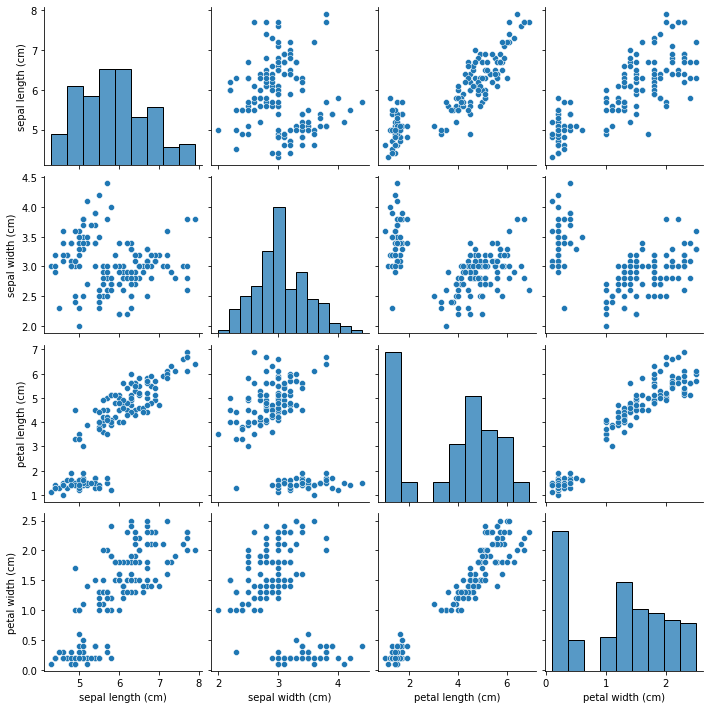

In [11]:
sns.pairplot(idf)
plt.show()

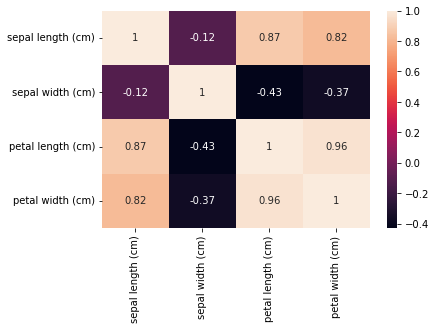

In [13]:
sns.heatmap(idf.corr(), annot=True)
plt.show()

# 3. Training Model

## 3.1. KMean Clustering

In [68]:
#create kmean model(assuming two clusters) here and explore outputs 
from sklearn.cluster import KMeans
X = idf[['petal length (cm)', 'petal width (cm)']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans

KMeans(n_clusters=2, random_state=0)

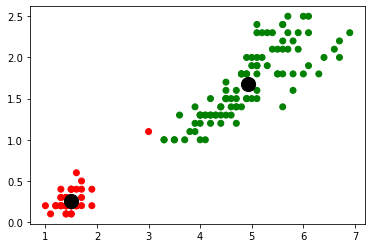

In [69]:
#plot clusters formed by Kmean
colormap = np.array(['r', 'g', 'b'])
categories = kmeans.predict(X)
X = idf[['petal length (cm)', 'petal width (cm)']]
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[categories])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


## 3.2. DBSCAN Clustering

In [27]:
#create DBSCAN model here and compare output with KMean
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.5)
db.fit(X)


DBSCAN()

In [29]:
y_pred = db.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

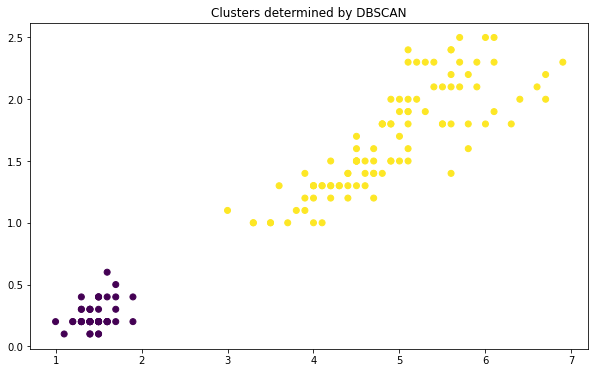

In [30]:
#Plot clusters formed by DBSCAN
plt.figure(figsize=(10,6))
plt.scatter(X['petal length (cm)'], X['petal width (cm)'],c=y_pred)
plt.title("Clusters determined by DBSCAN")
plt.show()

# Part B: Differentiate DBSCAN from KMean on moon shaped dataset

`sklearn.datasets.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)`

#### - Generate moon-shaped dataset using make_moons() function. Plot clusters to compare clusters formed by Kmean and DBSCAN algorithm.


#### - Change eps value and min_sample value to explore their effect on the learning algorithm.





In [48]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=100, random_state=0)

In [49]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

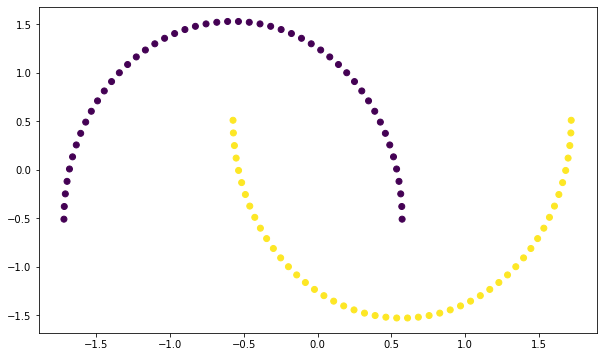

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [75]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

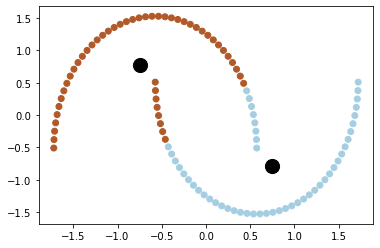

In [52]:
y_pred = kmeans.predict(x)
plt.scatter(x[:,0], x[:,1],c=y_pred, cmap='Paired')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);


In [56]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [53]:
db = DBSCAN(eps = 0.5)
db.fit(x)


DBSCAN()

In [70]:
y_pred1 = db.fit_predict(x)
y_pred1

array([ 0, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1, -1,  1, -1, -1,  0,  0,
        0,  0, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  0,  0, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  1, -1,  1,  1,  0,  1,
        0, -1,  0,  0, -1, -1, -1,  1,  0, -1,  1,  1,  0, -1,  1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  0,  1, -1, -1,  1,  1, -1, -1],
      dtype=int64)

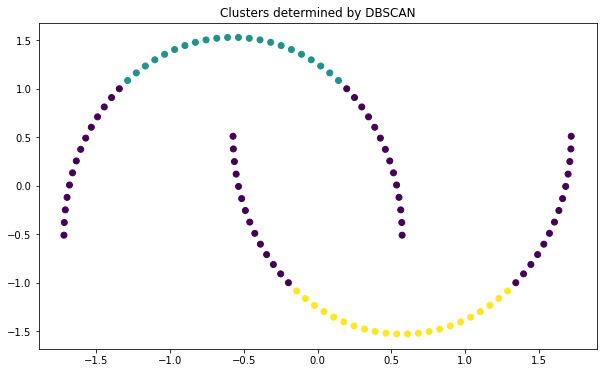

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred1)
plt.title("Clusters determined by DBSCAN")
plt.show()

In [66]:
db = DBSCAN(eps = 0.4, min_samples=10)
db.fit(x)
y_pred2 = db.fit_predict(x)
y_pred2

array([ 0, -1, -1, -1,  1, -1,  0,  1, -1, -1, -1, -1,  1, -1, -1,  0,  0,
        0,  0, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,
       -1,  0,  0, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1,
       -1, -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  1, -1,  1,  1,  0,  1,
        0, -1,  0,  0, -1, -1, -1,  1,  0, -1,  1,  1,  0, -1,  1, -1, -1,
        1, -1, -1, -1,  1, -1, -1,  0,  1, -1, -1,  1,  1, -1, -1],
      dtype=int64)

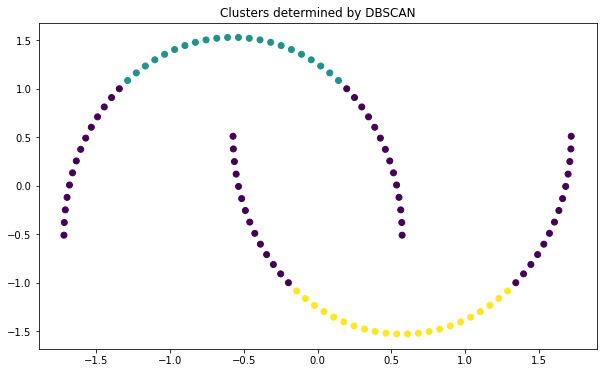

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred2)
plt.title("Clusters determined by DBSCAN")
plt.show()

In [72]:
db = DBSCAN(eps = 0.8, min_samples=3)
db.fit(x)
y_pred3 = db.fit_predict(x)
y_pred3

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

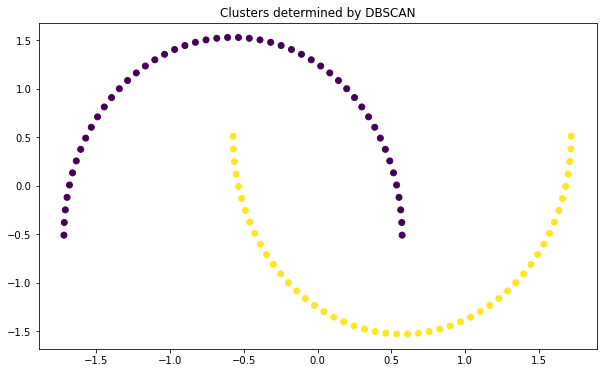

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1],c=y_pred3)
plt.title("Clusters determined by DBSCAN")
plt.show()